<H1>Analysis of ML model performance on D21/T21-BMI<H1/>
<H2>Comparison of model performance of 1000 Elastics Regression models for BMI prediction on original and shuffled labelled data from the
PLIER LVs in the HTP cohort.</H2>

In [1]:
import time
import os

import pandas as pd

start_seconds = time.time()

project_root_path=os.path.abspath(os.path.join(os.path.dirname('__file__')))


print(project_root_path)

out_ml_class_dif_co_occu= os.path.join(project_root_path,'output','res_t21_d21_bmi_dis_co_occu_on_plier_lvs.csv')


ml_results=pd.read_csv(out_ml_class_dif_co_occu, sep="\t")
display(ml_results)

/media/sutanu/wd_sn_costello_lab/project/omni_PLIER/penalized_regression/t21_d21_bmi_plier_lvs_w_bc


,lebel_type,dis_co_occu,ran_ds_no,best_l1_ratio,best_C,best_cv_train_rmse,test_rmse
0,ori_leb,BMI,0,0.1,0.4,4.951,5.465
1,shuff_leb,BMI,0,0.1,1000.0,7.773,7.278
2,ori_leb,BMI,1,0.1,0.4,4.764,6.364
3,shuff_leb,BMI,1,0.9,1.0,7.745,7.403
4,ori_leb,BMI,2,0.1,0.4,4.547,7.054
...,...,...,...,...,...,...,...
1995,shuff_leb,BMI,997,0.9,1.0,7.769,7.268
1996,ori_leb,BMI,998,0.1,0.6,5.048,6.354
1997,shuff_leb,BMI,998,0.1,1000.0,7.433,8.509
1998,ori_leb,BMI,999,0.1,0.4,4.705,6.450


BMI


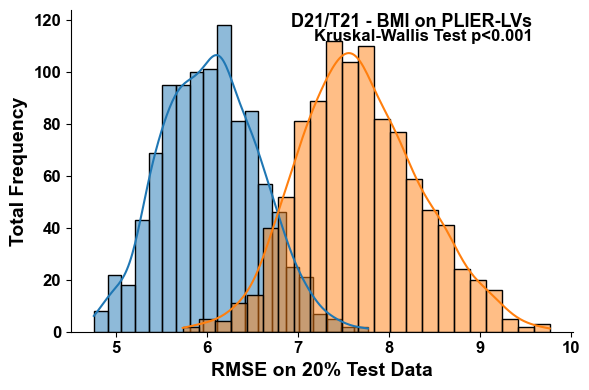

In [2]:
# importing libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns

import time
import os

import pandas as pd

start_seconds = time.time()

project_root_path=os.path.abspath(os.path.join(os.path.dirname('__file__')))




out_ml_class_dif_co_occu= os.path.join(project_root_path,'output','res_t21_d21_bmi_dis_co_occu_on_plier_lvs.csv')


ml_results=pd.read_csv(out_ml_class_dif_co_occu, sep="\t")


dis_co_occu_in_T21= ml_results['dis_co_occu'].unique()
res_plot="./output/htp_tpm_t21_d21_bmi_dis_co_occu_on_plier_lvs.jpeg"


for dco in dis_co_occu_in_T21:
    #print("#############################################")

    dco_fn = dco.replace("/", "")
    dco_fn = dco_fn.replace(" ", "_")
    print(dco_fn)

    best_cv_test_balanced_accuracy_ori_leb=ml_results['test_rmse'][(ml_results['lebel_type'] == 'ori_leb') & (ml_results['dis_co_occu'] == dco)]
    best_cv_test_balanced_accuracy_shuff_leb=ml_results['test_rmse'][(ml_results['lebel_type'] == 'shuff_leb') & (ml_results['dis_co_occu'] == dco)]
    
    # Conduct the Kruskal-Wallis Test 
    res_Kruskal_Wallis_Test = stats.kruskal(best_cv_test_balanced_accuracy_ori_leb, best_cv_test_balanced_accuracy_shuff_leb)

    # Print the result
    k_p_value=round(res_Kruskal_Wallis_Test[1],3)
    
    
    plt.rcParams["figure.figsize"] = [6, 4]
    plt.rcParams["figure.autolayout"] = True
    plt.rcParams["font.family"] = "Arial"


    # plotting first histogram
    ax=sns.histplot(best_cv_test_balanced_accuracy_ori_leb, kde=True)

    # plotting second histogram
    ax=sns.histplot(best_cv_test_balanced_accuracy_shuff_leb, kde=True)
    
    plt.ylabel("Total Frequency", fontsize=14, fontweight='bold')

    plt.xlabel("RMSE on 20% Test Data", fontsize=14, fontweight='bold')
    
    if k_p_value<0.001:
        text_kwalli_test="Kruskal-Wallis Test p<0.001"
    else:
        text_kwalli_test="Kruskal-Wallis Test p>0.001"
        
    
    
    ax.annotate(f"D21/T21 - BMI on PLIER-LVs", xy=(0.92, 0.99),xycoords='axes fraction', fontsize=13, horizontalalignment='right', verticalalignment='top', fontweight='bold')
    ax.annotate(f"{text_kwalli_test}", xy=(0.92, 0.94),xycoords='axes fraction', fontsize=12, horizontalalignment='right', verticalalignment='top', fontweight='bold')
    
    # Remove the top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.xticks(fontsize=12,fontweight='bold')
    plt.yticks(fontsize=12,fontweight='bold')
    plt.savefig(res_plot, bbox_inches = 'tight', dpi=300)
    plt.show()
  